In [1]:
# Mengimport modul yang akan digunakan 
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os
import zipfile
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
# Download dataset dari dicoding 
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-04-20 05:53:35--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1.85MB/s    in 3m 40s  

2021-04-20 05:57:17 (1.40 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
# Melakukan unzip pada dataset yang telah didownload 
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
# Membuat directory train dan validation 
base_dir = '/tmp/rockpaperscissors/rps-cv-images'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')

In [5]:
# Melihat list directory 
os.listdir(base_dir)

['rock', 'scissors', 'paper', 'README_rpc-cv-images.txt']

In [6]:
# Image data generator, disini menggunakan parameter validation_split untuk memisahkan dataset  
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range = 0.2,
    fill_mode = 'nearest',
    validation_split=0.4
    )

test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range = 0.2,
    fill_mode = 'nearest'
    )

In [7]:
# Melakukan penyesuaian dataset dan didapatkan training set dan validation set
train_generator = train_datagen.flow_from_directory(
        base_dir,  
        target_size=(150, 150),
        shuffle='True',
        subset='training',
        class_mode='categorical'
        )

validation_generator = train_datagen.flow_from_directory(
        base_dir,  
        target_size=(150, 150),  
        shuffle='True',
        subset='validation',
        class_mode='categorical'
        )

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [8]:
# Membuat model CNN 
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [9]:
# Membuat model mampu belajar dengan optimizer dan loss function 
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [10]:
# Melakukan training model
history = model.fit(
      train_generator,
      steps_per_epoch=20,  
      epochs=15,
      validation_data=validation_generator, 
      validation_steps=5,  
      verbose=2) 

Epoch 1/15
20/20 - 38s - loss: 1.1891 - accuracy: 0.3812 - val_loss: 1.0761 - val_accuracy: 0.4125
Epoch 2/15
20/20 - 5s - loss: 0.9703 - accuracy: 0.5869 - val_loss: 0.6169 - val_accuracy: 0.7437
Epoch 3/15
20/20 - 5s - loss: 0.6173 - accuracy: 0.7607 - val_loss: 0.3865 - val_accuracy: 0.8438
Epoch 4/15
20/20 - 5s - loss: 0.3554 - accuracy: 0.8813 - val_loss: 0.1912 - val_accuracy: 0.9500
Epoch 5/15
20/20 - 5s - loss: 0.2833 - accuracy: 0.8951 - val_loss: 0.5355 - val_accuracy: 0.7875
Epoch 6/15
20/20 - 5s - loss: 0.3811 - accuracy: 0.8590 - val_loss: 0.2512 - val_accuracy: 0.9000
Epoch 7/15
20/20 - 5s - loss: 0.1829 - accuracy: 0.9422 - val_loss: 0.2049 - val_accuracy: 0.9438
Epoch 8/15
20/20 - 5s - loss: 0.1552 - accuracy: 0.9516 - val_loss: 0.1505 - val_accuracy: 0.9688
Epoch 9/15
20/20 - 5s - loss: 0.1476 - accuracy: 0.9438 - val_loss: 0.2181 - val_accuracy: 0.9563
Epoch 10/15
20/20 - 5s - loss: 0.0994 - accuracy: 0.9641 - val_loss: 0.1640 - val_accuracy: 0.9750
Epoch 11/15
20/20 

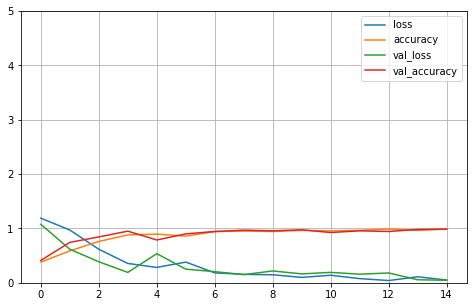

In [12]:
# Plotting 
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,5) # set the vertical range to [0-1]

plt.show()

In [14]:
# Mengupload gambar yang akan diprediksi oleh model
uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  else:
    print('scissor')